# MaterialsCoord benchmarking – ternary materials scores

Benchmark and plot the results of the near neighbor algorithms on ternary structures.

*Written using:*
- MaterialsCoord==0.1.0

*Authors: Hillary Pan, Alex Ganose (10/12/19)*

First, lets initialize the near neighbor methods we are interested in.

In [1]:
from pymatgen.analysis.local_env import BrunnerNN_reciprocal, EconNN, JmolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, CrystalNN

nn_methods = [
    MinimumDistanceNN(),  MinimumOKeeffeNN(), MinimumVIRENN(), JmolNN(), 
    EconNN(), BrunnerNN_reciprocal(), VoronoiNN(tol=0.5), CrystalNN()
]

Next, import the benchmark and choose the elemental structure set.

In [2]:
from materialscoord.core import Benchmark

structure_groups = ["A2BX4", "ABX3", "ABX4"]

bm = Benchmark.from_structure_group(structure_groups)

Calculate the benchmark scores for each algorithm for the cation sites.

In [3]:
cation_scores = bm.score(nn_methods, site_type="cation")
cation_scores

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "


,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,JmolNN,EconNN,BrunnerNN_reciprocal,VoronoiNN,CrystalNN
AlAsO4_33254,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
BAsO4_highcristobalite_26891,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
BaAl2O4_21080,0.000000,1.000000,0.000000,3.000000,2.000000,0.0,0.000000,0.000000
BaTiO3_67520,0.500000,6.500000,0.500000,6.000000,0.000000,0.0,0.000000,0.000000
BaZnF4_182604,2.500000,4.500000,2.500000,5.500000,1.000000,1.5,1.000000,0.000000
Be2SiO4_phenakite_64942,0.000000,0.000000,0.000000,2.666667,0.000000,0.0,0.000000,0.000000
CaB2O4_34641,0.666667,0.666667,0.666667,2.666667,0.000000,0.0,0.000000,0.000000
CaCO3_aragonite_15194,0.000000,0.000000,0.000000,4.500000,0.000000,0.0,0.000000,0.000000
CaCO3_calcite_18164,0.000000,0.000000,0.000000,3.000000,3.000000,0.0,0.000000,0.000000
CaFe2O4_166080,0.000000,2.666667,0.000000,1.000000,0.333333,0.0,0.000000,0.000000


Plot the cation results.

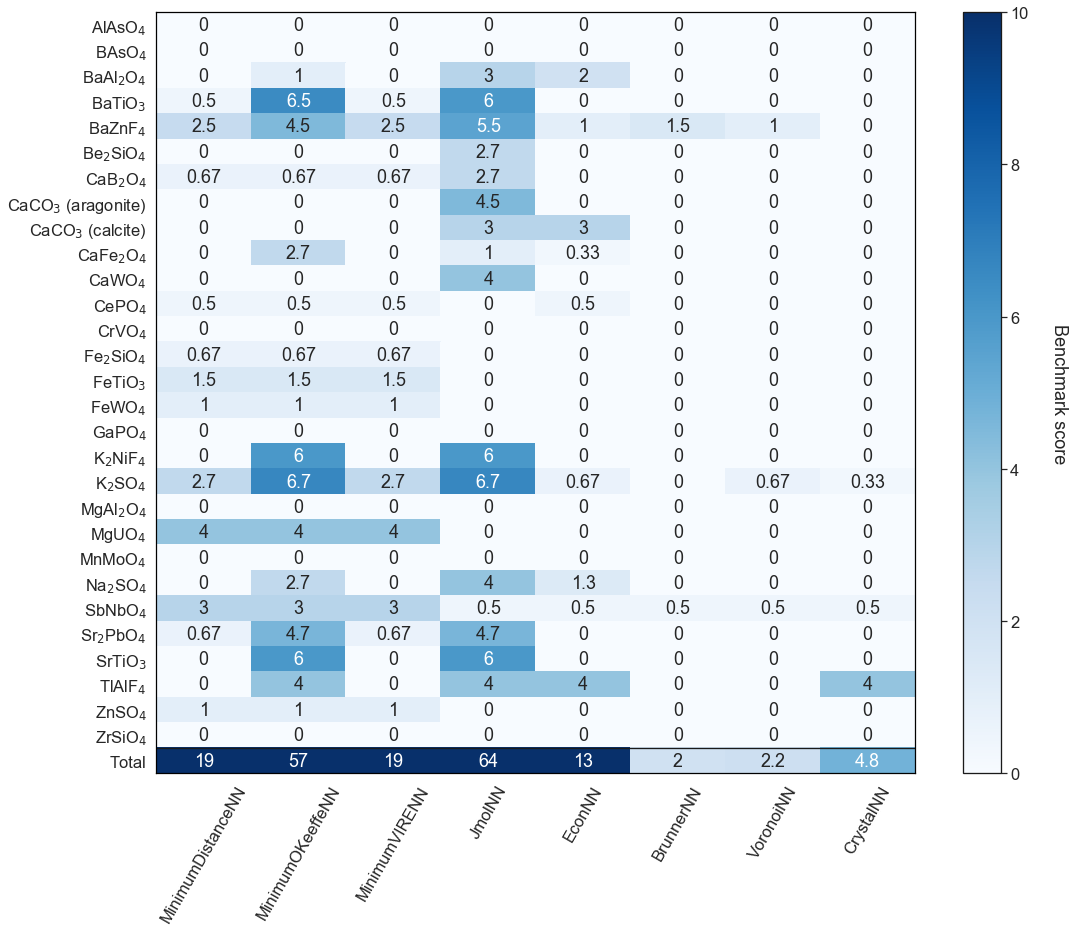

In [4]:
%matplotlib inline
import os

from materialscoord.plot import plot_benchmark_scores

structure_mapping = {
    'AlAsO4_33254': 'AlAsO$_4$',
    'BAsO4_highcristobalite_26891': 'BAsO$_4$',
    'BaAl2O4_21080': 'BaAl$_2$O$_4$',
    'BaTiO3_67520': 'BaTiO$_3$',
    'BaZnF4_182604': 'BaZnF$_4$',
    'Be2SiO4_phenakite_64942': 'Be$_2$SiO$_4$',
    'CaB2O4_34641': 'CaB$_2$O$_4$',
    'CaCO3_aragonite_15194': 'CaCO$_3$ (aragonite)',
    'CaCO3_calcite_18164': 'CaCO$_3$ (calcite)',
    'CaFe2O4_166080': 'CaFe$_2$O$_4$',
    'CaWO4_scheelite_15586': 'CaWO$_4$',
    'CePO4_monazite_79746': 'CePO$_4$',
    'CrVO4_27508': 'CrVO$_4$',
    'Fe2SiO4_olivine_4353': 'Fe$_2$SiO$_4$',
    'FeTiO3_ilmenite_9805': 'FeTiO$_3$',
    'FeWO4_wolframite_26811': 'FeWO$_4$',
    'GaPO4_lowcristobalite_97550': 'GaPO$_4$',
    'K2NiF4_73450': 'K$_2$NiF$_4$',
    'K2SO4_beta_2827': 'K$_2$SO$_4$',
    'MgAl2O4_spinel_31373': 'MgAl$_2$O$_4$',
    'MgUO4_24725': 'MgUO$_4$',
    'MnMoO4_alpha_15615': 'MnMoO$_4$',
    'Na2SO4_thenardite_2895': 'Na$_2$SO$_4$',
    'SbNbO4_20344': 'SbNbO$_4$',
    'Sr2PbO4_16806': 'Sr$_2$PbO$_4$',
    'SrTiO3_perovskite_80871': 'SrTiO$_3$',
    'TlAlF4_202453': 'TlAlF$_4$',
    'ZnSO4_71018': 'ZnSO$_4$',
    'ZrSiO4_zircon_15759': 'ZrSiO$_4$',
}
nn_method_mapping = {"BrunnerNN_reciprocal": "BrunnerNN"}

plt = plot_benchmark_scores(cation_scores, 
                            structure_mapping=structure_mapping,
                            nn_method_mapping=nn_method_mapping,
                            figsize=(17, 14))

plt.savefig(os.path.join("plots", "ternary-cation.pdf"), bbox_inches='tight')
plt.show()

Calculate the benchmark scores for each algorithm for the anion sites.

In [6]:
anion_scores = bm.score(nn_methods, site_type="anion")
anion_scores

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better resul

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent o

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states sp

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3532: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3347: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent o

,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,JmolNN,EconNN,BrunnerNN_reciprocal,VoronoiNN,CrystalNN
AlAsO4_33254,0.500000,1.50,0.500000,0.50,0.50,0.50,0.500000,0.500000
BAsO4_highcristobalite_26891,1.000000,1.00,0.000000,0.00,0.00,0.00,0.000000,0.000000
BaAl2O4_21080,2.250000,2.25,0.750000,2.25,2.25,2.25,2.250000,2.250000
BaTiO3_67520,4.333333,3.00,0.333333,4.00,0.00,4.00,2.666667,2.666667
BaZnF4_182604,2.750000,0.50,0.500000,2.75,0.50,2.75,1.250000,1.500000
Be2SiO4_phenakite_64942,0.000000,2.00,0.000000,2.00,0.00,0.00,0.000000,0.000000
CaB2O4_34641,3.500000,3.50,3.500000,3.50,3.50,3.50,3.000000,3.500000
CaCO3_aragonite_15194,3.000000,3.00,2.000000,3.00,3.00,3.00,3.000000,3.000000
CaCO3_calcite_18164,2.000000,2.00,0.000000,2.00,2.00,2.00,0.000000,0.000000
CaFe2O4_166080,2.000000,0.50,0.000000,0.75,0.00,2.00,0.000000,0.000000


Plot the anion results.

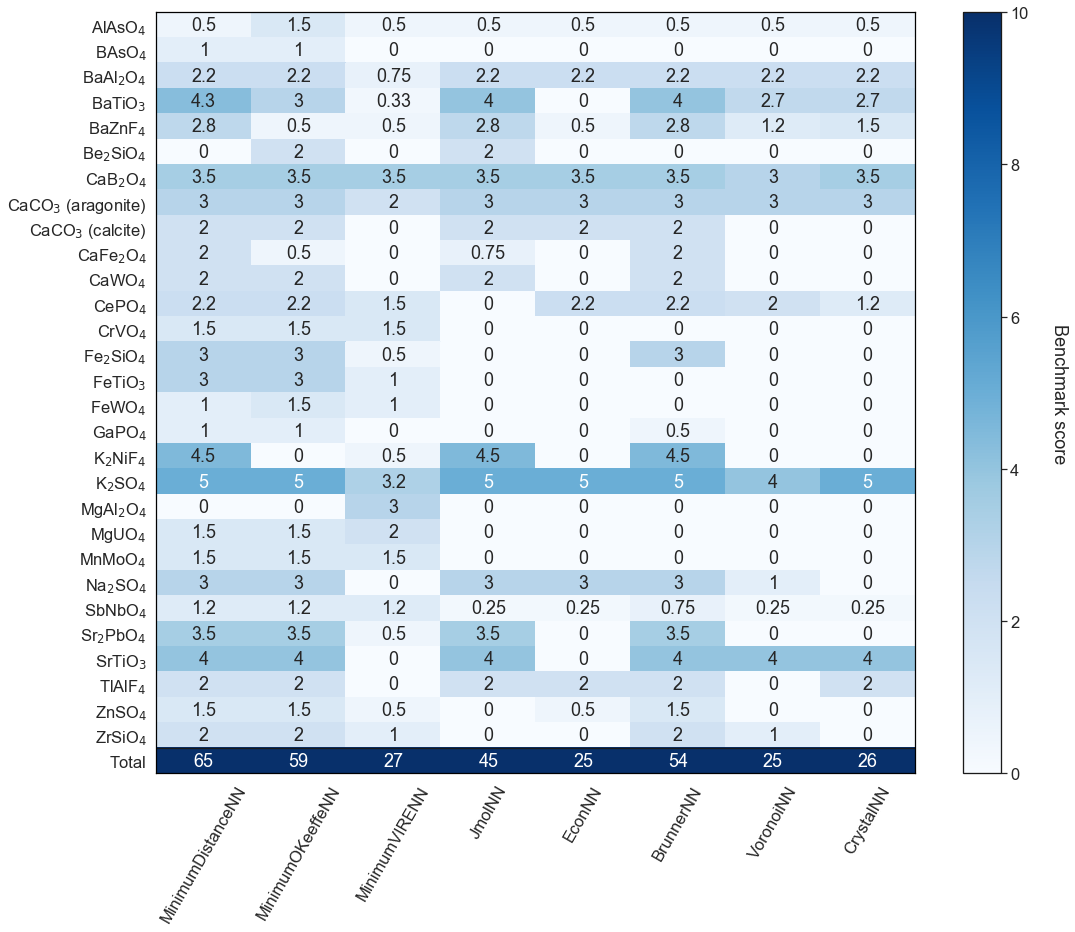

In [7]:
%matplotlib inline
import os

from materialscoord.plot import plot_benchmark_scores

plt = plot_benchmark_scores(anion_scores, 
                            structure_mapping=structure_mapping,
                            nn_method_mapping=nn_method_mapping,
                            figsize=(17, 14))

plt.savefig(os.path.join("plots", "ternary-anion.pdf"), bbox_inches='tight')
plt.show()